In [1]:
# Importing libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Change all categorical values to numerial using one hot encoding.
One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

The advantages of using one hot encoding include:

1. It allows the use of categorical variables in models that require numerical input.
2. It can improve model performance by providing more information to the model about the categorical variable.
3. It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

In [4]:
insurance_encoded = pd.get_dummies(insurance)

In [5]:
insurance_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
X = insurance_encoded.drop('charges', axis=1)
Y = insurance_encoded['charges']

In [7]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [8]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Set random seed
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8947.1084 - mae: 8947.1084
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7856.5708 - mae: 7856.5708
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7582.0669 - mae: 7582.0669
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7522.6343 - mae: 7522.6343
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 7690.7612 - mae: 7690.7612
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7651.2427 - mae: 7651.2427
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7529.4062 - mae: 7529.4062
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7731.7646 - mae: 7731.7646
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7612.1338 - mae: 7612.1338
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7735.8267 - mae: 7735.8267

In [11]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 10ms/step - loss: 7370.1924 - mae: 7370.1924


[7370.1923828125, 7370.1923828125]

In [12]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [13]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4856.7437 - mae: 4856.7437


[4856.74365234375, 4856.74365234375]

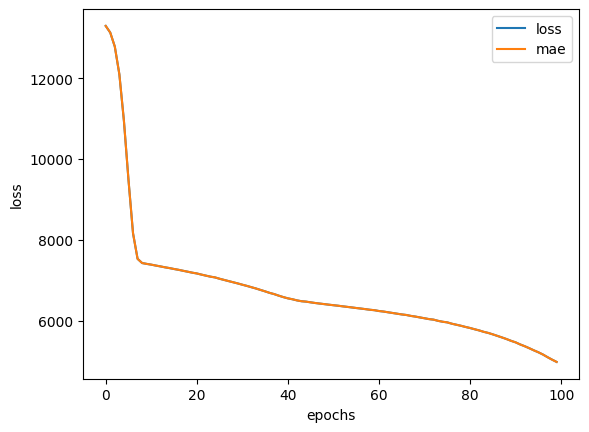

In [14]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [15]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3495.7588 - mae: 3495.7588


(3495.7587890625, 3495.7587890625)

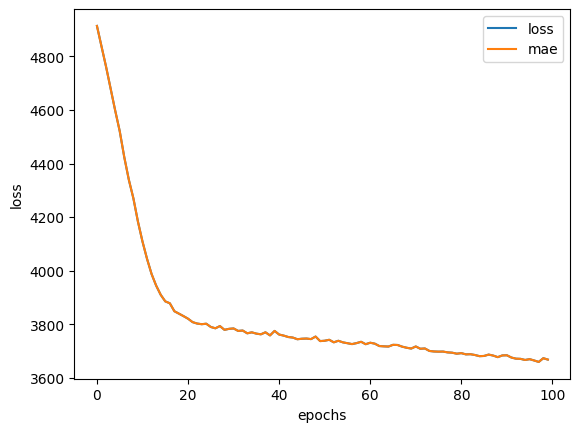

In [17]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");